In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Introduction

The goal for this project is to give some insight into what contributes to winning in NBA Basketball games. I hope my findings can help provide information to the National Basketball Association on what factors combine to affect to help teams win. NBA Coaches and General Managers may especially find the findings useful in determining what to discover.

For this project I plan to use the NBA shot logs.The dataset contains information about data on shots taken during the 2014-2015 NBA season.
Features like who took the shot, where on the floor was the shot taken from, who was the nearest defender, how far away was the nearest defender, and time on the shot clock.By evaluating the data one can know who the best shooter is, who the best defender is and see if there is any correlation to the outcome of the game.
The original dataset contains data types of: numeric and characters. The size of the dataset is 128,045 rows by 21 columns.


Let's get started by reading the dataset from the drive and do some Exploratory Data Analysis (EDA) to get the general idea of data we have.

In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/dataset/shot.xlsx')

Converting all the column names to lower letters so it will be consistent and easy throughout the porject.

In [ ]:
# making lower case to all columns names
df.columns = df.columns.str.lower()

Now let's see the general structure of the dataset and how the data is structured

In [ ]:
df.head()

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09:00,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14:00,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47:00,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34:00,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### Seperating categorical and numerical columns

Selecting only numerical columns as well as categorical columns just so we can generate different reports on each of them

In [ ]:
numerical_col = df.select_dtypes(include = ['float64', 'int64'])
categorical_col = df.select_dtypes(include = ['object'])

In [ ]:
numerical_col.head()

,game_id,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
0,21400899,24,1,1,10.8,2,1.9,7.7,2,101187,1.3,1,2,203148
1,21400899,24,2,1,3.4,0,0.8,28.2,3,202711,6.1,0,0,203148
2,21400899,24,3,1,NaN,3,2.7,10.1,2,202711,0.9,0,0,203148
3,21400899,24,4,2,10.3,2,1.9,17.2,2,203900,3.4,0,0,203148
4,21400899,24,5,2,10.9,2,2.7,3.7,2,201152,1.1,0,0,203148


In [ ]:
categorical_col.head()

,matchup,location,w,game_clock,shot_result,closest_defender,player_name
0,"MAR 04, 2015 - CHA @ BKN",A,W,01:09:00,made,"Anderson, Alan",brian roberts
1,"MAR 04, 2015 - CHA @ BKN",A,W,00:14:00,missed,"Bogdanovic, Bojan",brian roberts
2,"MAR 04, 2015 - CHA @ BKN",A,W,00:00:00,missed,"Bogdanovic, Bojan",brian roberts
3,"MAR 04, 2015 - CHA @ BKN",A,W,11:47:00,missed,"Brown, Markel",brian roberts
4,"MAR 04, 2015 - CHA @ BKN",A,W,10:34:00,missed,"Young, Thaddeus",brian roberts


It seems there are few categorical columns which we might convert to numerical later down the road

### Summerizing the data

In [ ]:
df.dtypes

game_id                         int64
matchup                        object
location                       object
w                              object
final_margin                    int64
shot_number                     int64
period                          int64
game_clock                     object
shot_clock                    float64
dribbles                        int64
touch_time                    float64
shot_dist                     float64
pts_type                        int64
shot_result                    object
closest_defender               object
closest_defender_player_id      int64
close_def_dist                float64
fgm                             int64
pts                             int64
player_name                    object
player_id                       int64
dtype: object

In [ ]:
df.shape

(128069, 21)

The size of the dataset is 128,045 rows by 21 columns. Now let's see if there are any duplicate rows

### finding and removing duplicate rows

In [ ]:
# Check duplicate rows
dup = df[df.duplicated()]
print('Numbers of duplicated rows', dup.sum())

Numbers of duplicated rows game_id                       0.0
matchup                       0.0
location                      0.0
w                             0.0
final_margin                  0.0
shot_number                   0.0
period                        0.0
game_clock                    0.0
shot_clock                    0.0
dribbles                      0.0
touch_time                    0.0
shot_dist                     0.0
pts_type                      0.0
shot_result                   0.0
closest_defender              0.0
closest_defender_player_id    0.0
close_def_dist                0.0
fgm                           0.0
pts                           0.0
player_name                   0.0
player_id                     0.0
dtype: float64


There does not seem to be any duplicate rows which makes a lot easier for us. Now let's check if there are any data missing on the dataset.

### finding missing rows

In [ ]:
df.isnull().sum()

game_id                          0
matchup                          0
location                         0
w                                0
final_margin                     0
shot_number                      0
period                           0
game_clock                       0
shot_clock                    5567
dribbles                         0
touch_time                       0
shot_dist                        0
pts_type                         0
shot_result                      0
closest_defender                 0
closest_defender_player_id       0
close_def_dist                   0
fgm                              0
pts                              0
player_name                      0
player_id                        0
dtype: int64

There seems to be missing data in shot_clock. We can just take average of all the shot_clock and fill the missing data when we plan to use the column but for now let's do some more EDA.

### Exploring numerical and categorical data

In [ ]:
df.describe()

,game_id,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


Seeing some of the information above we can know a lot of things. For instance the touch_time is in negative which can mean that we might have some inaccuracies on our dataset. It also good to keep in mind that average shot_clock is around 12.45s which we can replace on that missing columns. Some other insights that we can generate is that average shot distance is aroung 13.5 whereas hightest shot distance is around 47 units far.

Let's gather more infomation about this dataset.

In [ ]:
numerical_col.nunique()

game_id                       904
final_margin                   88
shot_number                    38
period                          7
shot_clock                    241
dribbles                       33
touch_time                    313
shot_dist                     448
pts_type                        2
closest_defender_player_id    474
close_def_dist                299
fgm                             2
pts                             3
player_id                     281
dtype: int64

Some of the insights that can gather from the info above are :we have around 904 games that was recorded and information about 281 different players are recorded. 


Let's see if we can generate any meaningful infomation from numerical columns

In [ ]:
numerical_col.shape

(128069, 14)

In [ ]:
numerical_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_id                     128069 non-null  int64  
 1   final_margin                128069 non-null  int64  
 2   shot_number                 128069 non-null  int64  
 3   period                      128069 non-null  int64  
 4   shot_clock                  122502 non-null  float64
 5   dribbles                    128069 non-null  int64  
 6   touch_time                  128069 non-null  float64
 7   shot_dist                   128069 non-null  float64
 8   pts_type                    128069 non-null  int64  
 9   closest_defender_player_id  128069 non-null  int64  
 10  close_def_dist              128069 non-null  float64
 11  fgm                         128069 non-null  int64  
 12  pts                         128069 non-null  int64  
 13  player_id     

Since this is numerical data,let's plot the data and see if we can find something interesting

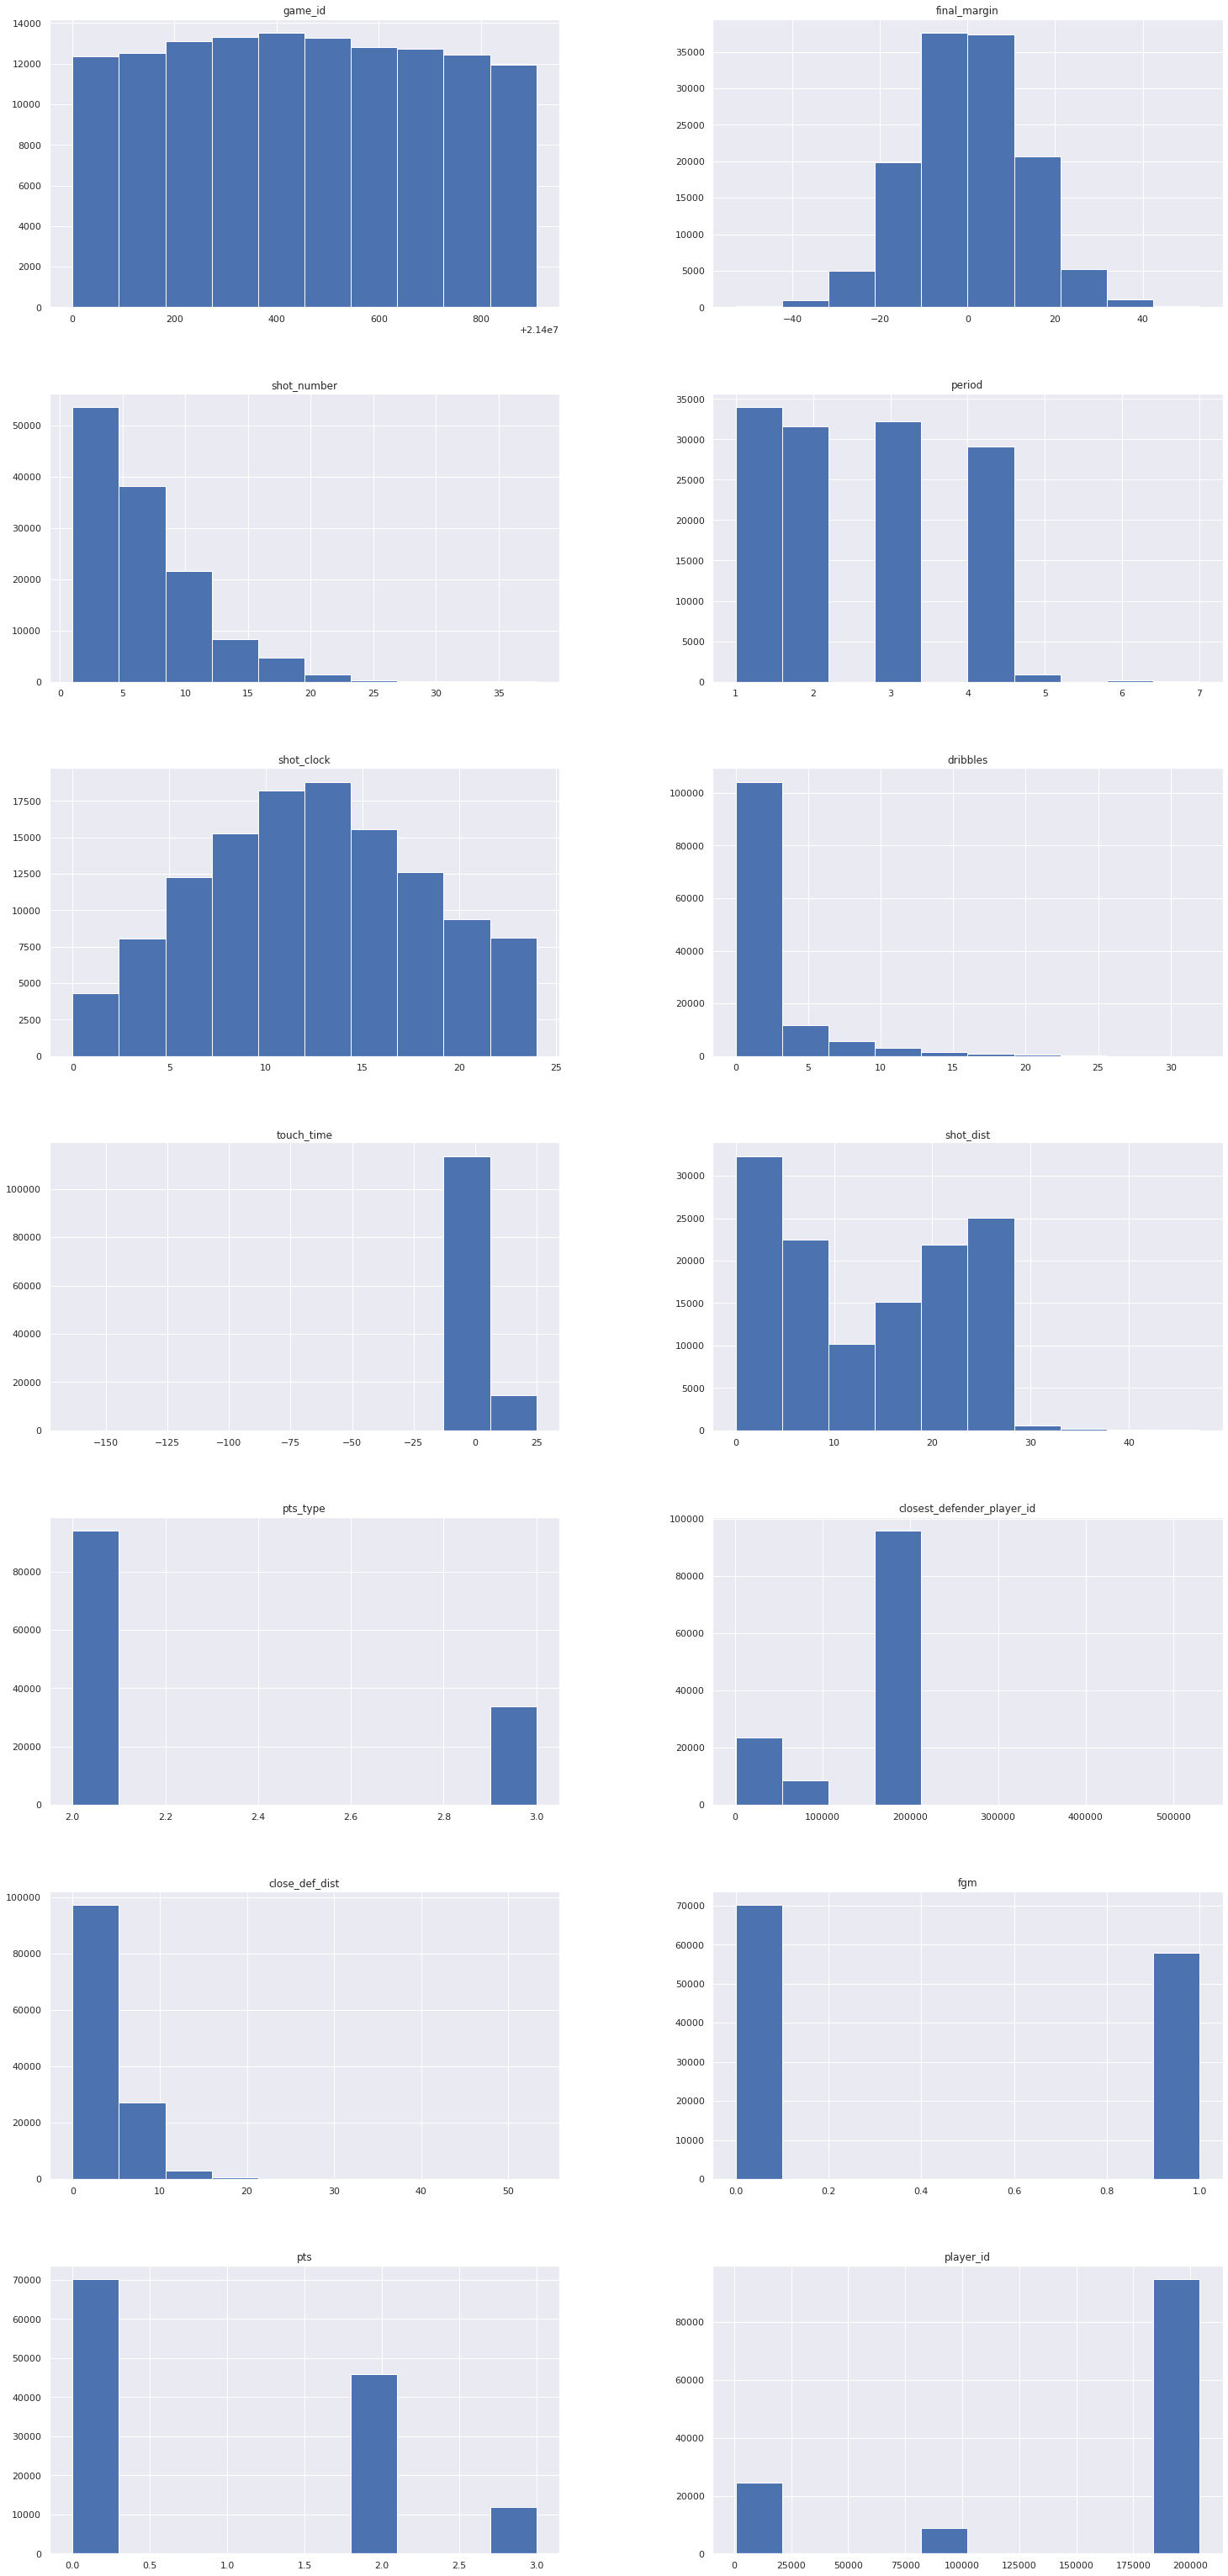

In [ ]:
sns.set()
numerical_col.hist(figsize = (25, 80),layout = (10, 2))
plt.show()

This gives an wonderful oppourtunity to see how so many data points follows normal distribution. Column like final margin and shot_clock shows how all the data in some ways are in normal distribution or be symmetric around the mean.

Let's see if we can see any correlation among the columns.

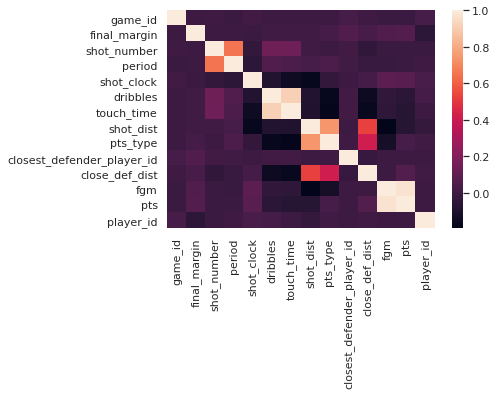

In [ ]:
# finding correlation among the columns
corr = numerical_col.corr()
sns.heatmap(corr)

##### The columns of SHOT_NUMBER and PERIOD, DRRIBLES and TOUCH_TIME, SHOT_DIST and PTS_TYPE and FGM and PTS are highly correlated. 

It is an interesting to also see that in some case close defender distance and shot distance or close defender distance and pts type are also correlated in some way. We might have to look closer the relationship of closest defender distance with other columns to get the full picture.

In [ ]:
categorical_col.nunique()

matchup             1808
location               2
w                      2
game_clock           719
shot_result            2
closest_defender     473
player_name          281
dtype: int64

This info also reinforces some of the infomation that we have gathered like there were 281 players and so on.

In [ ]:
categorical_col.shape

(128069, 7)

Let's see how many shots were made in comparision to the shots that were missed on the whole dataset. The shot missed will comprise of whole lot of data due to which the shot was missed. 

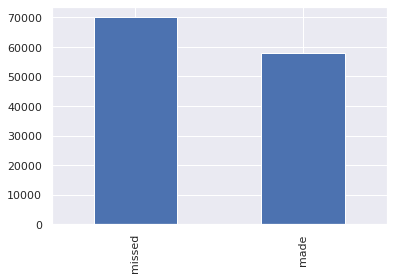

In [ ]:
categorical_col['shot_result'].value_counts().plot(kind = 'bar')

###### there are approximately 12000 more missed shot than made shots.

Also let's plot pairplot just to see how the data is distribu

In [ ]:
# sns.pairplot(df,hue='shot_result')

Now let's also look at percentage distributions of players that performed on last five games. This chart shows how any specific player performed on any specific number of games.

In [ ]:
def percentage_distribution(name,size):
    dic = {'missed':0,'made':1}
    temp = df.copy()
    temp['shot_result'] = temp['shot_result'].map(dic)
    perc = temp[df.player_name==name].groupby("game_id")["shot_result"].sum().values
    percents = perc[:(len(perc)//size)*size].reshape(-1, size)
    return sns.displot(percents,kind="hist",kde=True)

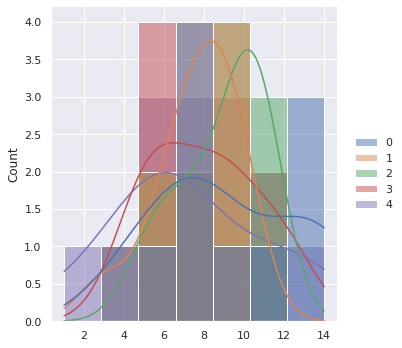

In [ ]:
# shot percentage distribution per each 5 games for james harden
percentage_distribution("james harden", 5);

Let's also generate the percentage distribution of 'lebron james' so that we can contrast and compare.

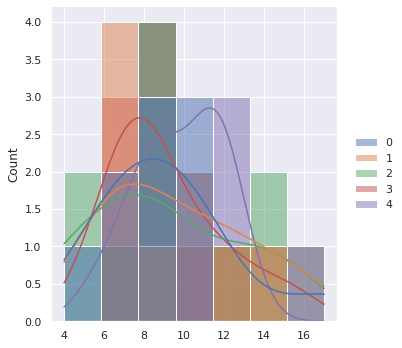

In [ ]:
# shot percentage distribution per each 5 games for lebron james
percentage_distribution("lebron james", 5);

By comparing the two pictures above we can clearly see how Lebron James shot results are relatively higher than compared to James Harden. It is also good to note that the games played by Lebron James has good consistancy meaning he performs about same in all those 5 matches compared to James Harden.

Now let's look at some of the insights on how and what make a shot score the point.

#### distribution of when the ball is thrown

In [ ]:
# sns.distplot(df.shot_clock);

It is beautiful to see that the shot_clock follows somewhat of a normal distribution. Just drawing conculsion from the chart, it seems generally people shoot arount 10-15 seconds or highly at the end in 24 seconds.

#### shotclock vs results

Now let's see when people shoot and when they miss.

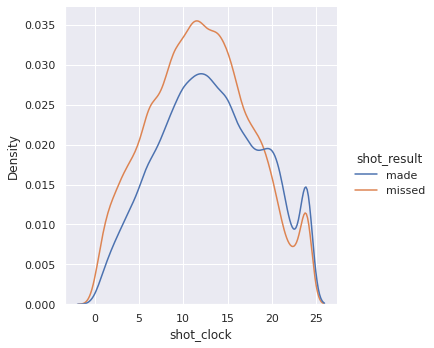

In [ ]:
sns.displot(
    data=df, kind="kde",
    x="shot_clock", hue="shot_result"
)

Again it seems looking at the data people score more in aroung 10-15 and some spike at the end meaning there is higher probability of scoring that but that hypothesis might be wrong since there is higher number of shots that was made during that time.

Now let's find out what is the shot result compared with the distance.

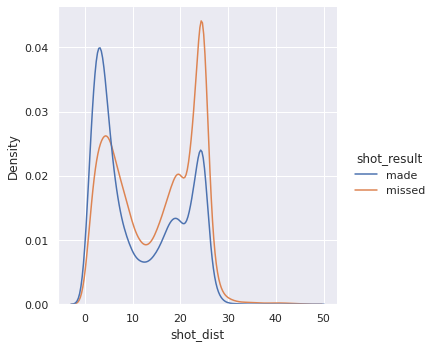

In [ ]:
sns.displot(
    data=df, kind="kde",
    x="shot_dist", hue="shot_result"
)

It seems the sweet spot of scoring is aroung 0-10 units of distance and then probaility seems to decrease and there is sudden spike of both higher pobability of missed followed by made which could mean only skillful player could make shot from that distance.

In [ ]:
dic = {'missed':0,'made':1}
temp = df.copy()
temp['shot_result'] = temp['shot_result'].map(dic)
sort = temp.groupby(["closest_defender","w"])["shot_result"].count()
sort = pd.DataFrame(sort)

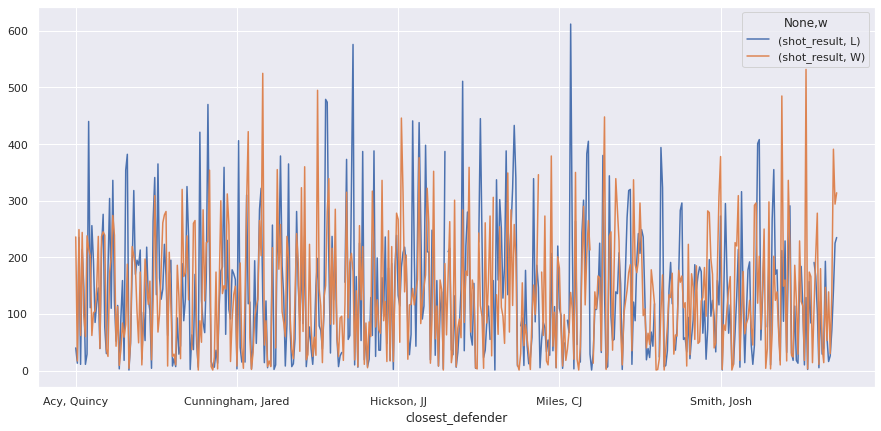

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sort.unstack().plot(ax=ax)

In [ ]:
df

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09:00,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14:00,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47:00,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34:00,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,01:52:00,18.3,5,6.2,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28:00,19.8,4,5.2,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10:00,23.0,2,4.2,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,02:37:00,9.1,4,4.5,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


# Testing the first hypothesis

#### Hypothesis 1 (Closest Defender)
#### a. Null Hypothesis: There is no difference in Closest Defender between the outcome of games (Win or Lose.)
#### b. Alternate Hypothesis: There is a difference in Closest Defender between the outcome of games (Win or Lose.)


##### Defining new column 'closer' where defender distance is less than 3 

In [ ]:
df['closer'] = (df['close_def_dist'] < 3).astype(int)

#### grouping by wins and game id and adding the total count of instance where defender was closer

In [ ]:
grp_by_game = df.groupby(['game_id', 'w']).agg({'closer': 'sum'})

In [ ]:
grp_by_game

closer
game_id  w        
21400001 L      30
         W      46
21400002 L      20
         W      25
21400003 L      32
...            ...
21400906 W      21
21400907 L      26
         W      19
21400908 L      17
         W      24

[1808 rows x 1 columns]

#### grouping by wins and adding the total count of instance where defender was closer

In [ ]:
finalgrp = grp_by_game.groupby(['w']).agg({'closer': 'sum'})

In [ ]:
finalgrp

,closer
w,
L,24550
W,23484


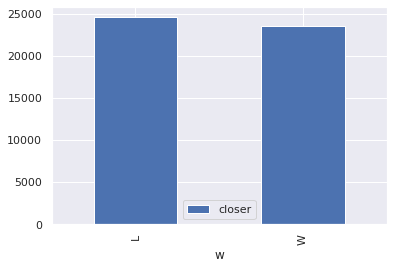

In [ ]:
finalgrp.plot.bar()

In [ ]:
finalgrp = finalgrp.reset_index()

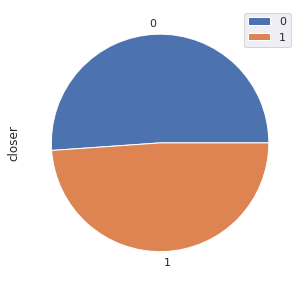

In [ ]:
finalgrp.plot.pie(y='closer', figsize=(5, 5))

#### From the diagrams above it seems that there is higher probability of winings where there are closer defenders defending the shot on every shot taken.


# Testing the Second hypothesis

#### Hypothesis 2 (shot result): 
#### a. Null Hypothesis: There is no difference in shot result between the outcome of games (Win or Lose).
#### b. Alternate Hypothesis: There is a difference in shot result between the outcome of games (Win or Lose.)

#### making categorial feature into numerical so we can perform aggeregation function

In [ ]:
dic = {'missed':0,'made':1}
df['result_num'] = df['shot_result'].map(dic)

In [ ]:
df[['shot_result', 'result_num']]

,shot_result,result_num
0,made,1
1,missed,0
2,missed,0
3,missed,0
4,missed,0
...,...,...
128064,missed,0
128065,made,1
128066,made,1
128067,missed,0


In [ ]:
df['result_num']=pd.to_numeric(df.result_num)

In [ ]:
grp_by_game = df.groupby(['game_id', 'w']).agg({'result_num': 'sum'})

In [ ]:
grp_by_game

result_num
game_id  w            
21400001 L          29
         W          36
21400002 L          31
         W          37
21400003 L          26
...                ...
21400906 W          40
21400907 L          25
         W          35
21400908 L          35
         W          29

[1808 rows x 1 columns]

In [ ]:
finalgrp = grp_by_game.groupby(['w']).agg({'result_num': 'sum'})

In [ ]:
finalgrp

,result_num
w,
L,27098
W,30807


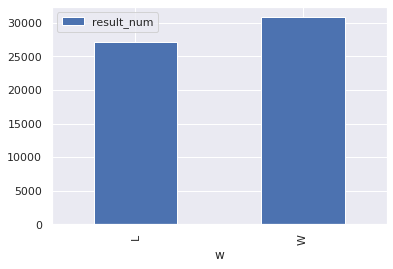

In [ ]:
finalgrp.plot.bar()

In [ ]:
finalgrp = finalgrp.reset_index()

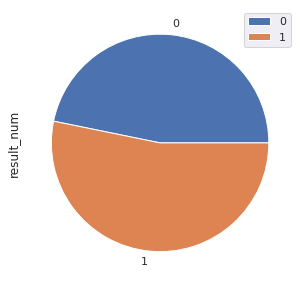

In [ ]:
finalgrp.plot.pie(y='result_num', figsize=(5, 5))

##### From the diagrams above it seems that there is higher probability of winings where there are more shots made.


# Conclusion

The overall project was analyzed and gave us really useful as well as insigihtful information about the dataset that we used.
Testing our conclusion we found out that the hypothesis that we create were proven by data.

For the first hypothesis where we wanted to see if there is a difference in Closest Defender between the outcome of games (Win or Lose.). This was tested and proved by aggregrating the data and seeing by grouping by wins and game id and adding the total count of instance where defender was closer than 3 units. Then just counted instances where the game was won vs game was loss for all those games.  The data showed that there were total count of	24550 loss whereas 23484 counts of wins showing that **if defender is closer than 3 units while making the shot, lower the probability of wining the game**.

Similary for the second hypothesis where we wanted to see if there is a shot result made difference between the outcome of games (Win or Lose.). We also tested and proved by similar approach taken as above where we aggregrated the count of total shot made in a game and counted the instances of those match and seeing which has the higher count. The data showed that there were total count of	27098 loss whereas 30807 counts of wins showing that **if shots are made, higher the probability of wining the game.**

We successfully performed the Exploratory Data Analysis on the data and tested the hypothesis.  

Doing this type of research will lead us to make data driven decisions.

### The next step:

Since the data is huge with enough dataset as well as features, for our next step we can compare different features and see the changes that affect the output of the game for example, distance from shot, time that shot was taken and find out sweet spot where probability of making shot is really high. We might find some features which might not have been looked up on. This again brings value to users.